In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN , Dense, Activation

In [7]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)

In [8]:
#EDA
# y_train ve x_train içeriisnde kaç label var buna bakmak istiyoruz
print("Y train.values: ",np.unique(Y_train))
print("Y test.values: ",np.unique(Y_test))


Y train.values:  [0 1]
Y test.values:  [0 1]


In [9]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Y train distribution ",dict(zip(unique,counts)))

unique, counts = np.unique(Y_test, return_counts=True)
print("Y test distribution ",dict(zip(unique,counts)))

Y train distribution  {0: 12500, 1: 12500}
Y test distribution  {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y test')

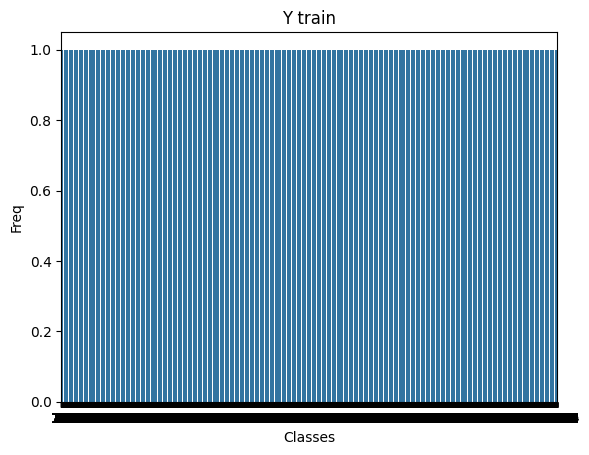

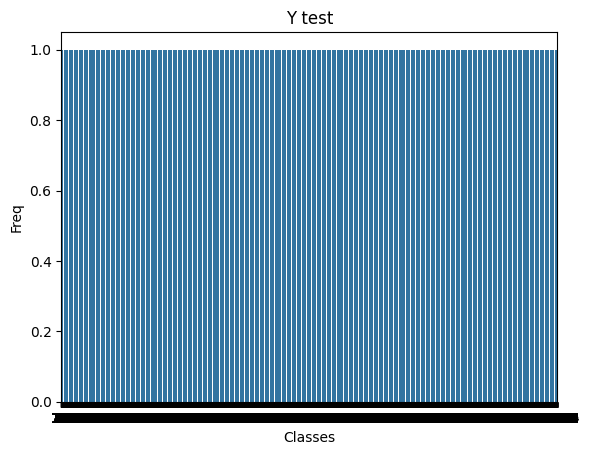

In [10]:
#countplot ile görselleştirelim
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")


In [11]:
review_len_train = []
review_len_test = []
for i , ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

<ipython-input-12-a4a77b30ebb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
<ipython-input-12-a4a77b30ebb6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test, hist_kws = {"alpha":0.3})


<Axes: ylabel='Density'>

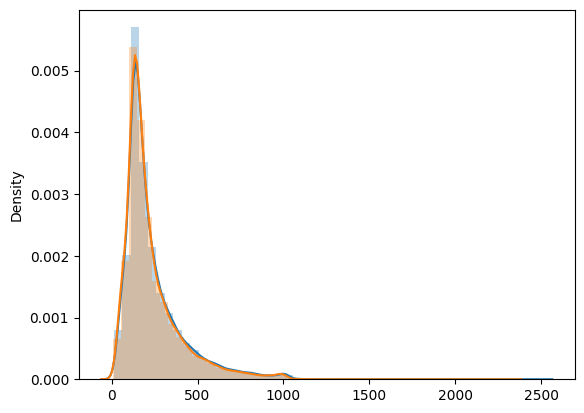

In [12]:
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

In [13]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

for keys, values in word_index.items():
    if values == 1:
        print(keys)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'dict'>
88584
the


In [14]:
def whatItSay(index = 24):
  reverse_index = dict([(value, key) for (key, value) in word_index.items()])
  decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]]) #ünlemleri get ediyorum
  print(decode_review)
  print(Y_train[index])
  return decode_review

decoded_review = whatItSay(36)

! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


In [15]:
#preprocess
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words = num_words)

In [16]:
#reviewlar farklı boyutlardaydı bunu düzenlemek için padding işlemi uygulayacağız
maxlen = 130
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

print(X_train[5])

for i in X_train[0:10]:
  print(len(i))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130


In [17]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32,input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape= (num_words,maxlen),return_sequences = False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid")) #binary classification yapabilmek adına sigmoid kullanıyıoruz
print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
history = rnn.fit(X_train,Y_train, validation_data = (X_test, Y_test) ,epochs = 5, batch_size = 128,verbose= 1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.5640 - loss: 0.6822 - val_accuracy: 0.6242 - val_loss: 0.6382
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7341 - loss: 0.5518 - val_accuracy: 0.7983 - val_loss: 0.4556
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8170 - loss: 0.4174 - val_accuracy: 0.8166 - val_loss: 0.4267
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8624 - loss: 0.3266 - val_accuracy: 0.8438 - val_loss: 0.3569
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8872 - loss: 0.2758 - val_accuracy: 0.8592 - val_loss: 0.3326


In [19]:
score = rnn.evaluate(X_test,Y_test)
print("Accuracy: %",score[1]*100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8566 - loss: 0.3385
Accuracy: % 85.91600060462952


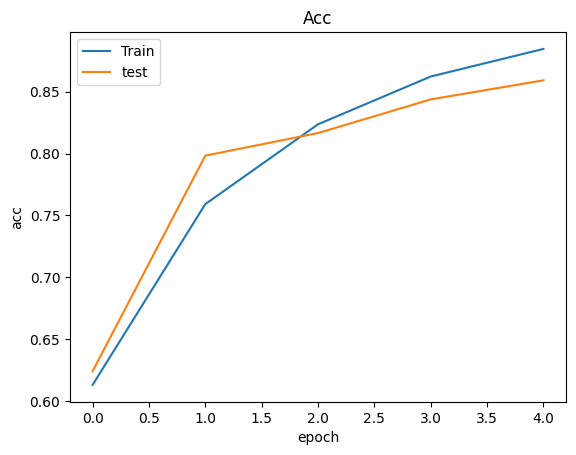

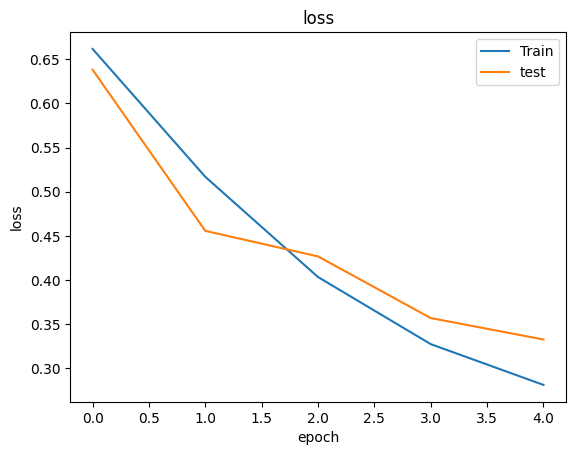

In [24]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="test")
plt.title("Acc")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="test")
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()